ДЗ

## Оценивание и штрафы


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Импорт необходимых библиотек

Импортируйте все используемые библиотеки здесь. Список можно расширить.

In [62]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ttest_1samp, uniform, binned_statistic_2d, poisson, chi2

### Задача 1: Сравниваем тесты (2.5 балла)

При известной дисперсии для проверки гипотез про матожидание распределения можно использовать не только Z-тест, но и t-тест. Проведите короткое исследование того, какой из этих двух тестов лучше использовать в данной ситуации. Обоснуйте свой выбор.

При проведении ислледования используте нормальное распределение и равномерное. Запишите свои выводы.

In [63]:
np.random.seed(42)

sample_sizes = [2, 5, 10, 25, 50, 75, 100, 200]
alpha = 0.05
num_simulations = 1000

def use_tests(distribution, params, var):
    results = {'sample_size': [], 'z_test': [], 't_test': []}
    
    for n in sample_sizes:
        rejected_z = 0
        rejected_t = 0
        
        for _ in range(num_simulations):
            if distribution == 'norm':
                sample = stats.norm.rvs(*params, size=n)
            elif distribution == 'uniform':
                sample = stats.uniform.rvs(*params, size=n)
            
            z_stat = (np.mean(sample) - params[0]) / (np.sqrt(var/n))
            z_p = 2 * (1 - stats.norm.cdf(abs(z_stat)))
            if z_p < alpha:
                rejected_z += 1
            
            t_stat, t_p = stats.ttest_1samp(sample, params[0])
            if t_p < alpha:
                rejected_t += 1
                
        results['sample_size'].append(n)
        results['z_test'].append(rejected_z / num_simulations)
        results['t_test'].append(rejected_t / num_simulations)
    
    return results

normal_params = (0, 1)
var_norm = 1
normal_results = use_tests('norm', normal_params, var_norm)

uniform_params = (0, 2)
var_uniform = (2**2)/12 
uniform_results = use_tests('uniform', uniform_params, var_uniform)

print(f'Нормальное распределение:\n {normal_results}\n')
print(f'Равномерное распределение:\n {uniform_results}')

Нормальное распределение:
 {'sample_size': [2, 5, 10, 25, 50, 75, 100, 200], 'z_test': [0.049, 0.038, 0.046, 0.059, 0.068, 0.039, 0.046, 0.056], 't_test': [0.037, 0.037, 0.039, 0.06, 0.076, 0.044, 0.046, 0.056]}

Равномерное распределение:
 {'sample_size': [2, 5, 10, 25, 50, 75, 100, 200], 'z_test': [0.693, 0.974, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 't_test': [0.136, 0.833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


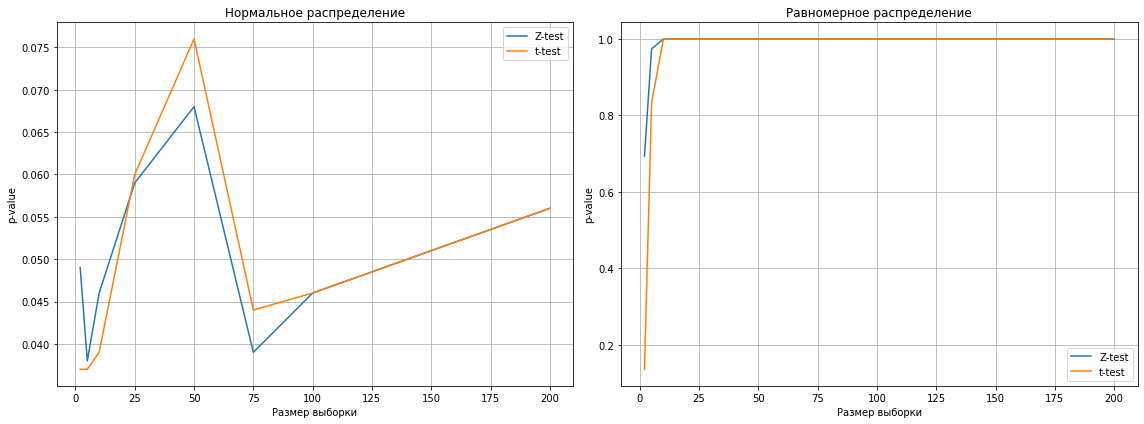

In [64]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(normal_results['sample_size'], normal_results['z_test'], label='Z-test')
plt.plot(normal_results['sample_size'], normal_results['t_test'], label='t-test')
plt.title('Нормальное распределение')
plt.xlabel('Размер выборки')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(uniform_results['sample_size'], uniform_results['z_test'], label='Z-test')
plt.plot(uniform_results['sample_size'], uniform_results['t_test'], label='t-test')
plt.title('Равномерное распределение')
plt.xlabel('Размер выборки')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

По графикам видно, что для маленьких выборок z-test показывает себя мощнее, однако при увеличении выборки мощность уравнивается. В данном случае считаю, что лучше использовать z-test, чем t-test так как он демонстрирует более высокую мощность.

### Задача 2: t-тест для экспоненциального распределения (2.5 балла)

Вы анализируете средний размер чека клиентов. До проведения акции предполагалось, что размер чека следует экспоненциальному распределению с известным параметром интенсивности (λ). После проведения маркетинговой акции необходимо проверить, изменился ли средний чек клиентов.

Ваш тимлид предложил использовать для этого t-тест для сравнения средних.

* Согласны ли вы с предложением использовать t-тест в данной ситуации? Обоснуйте ваш ответ.

* Какой статистический тест вы считаете более подходящим для проверки изменения среднего значения при экспоненциальном распределении? Обоснуйте ваш выбор.

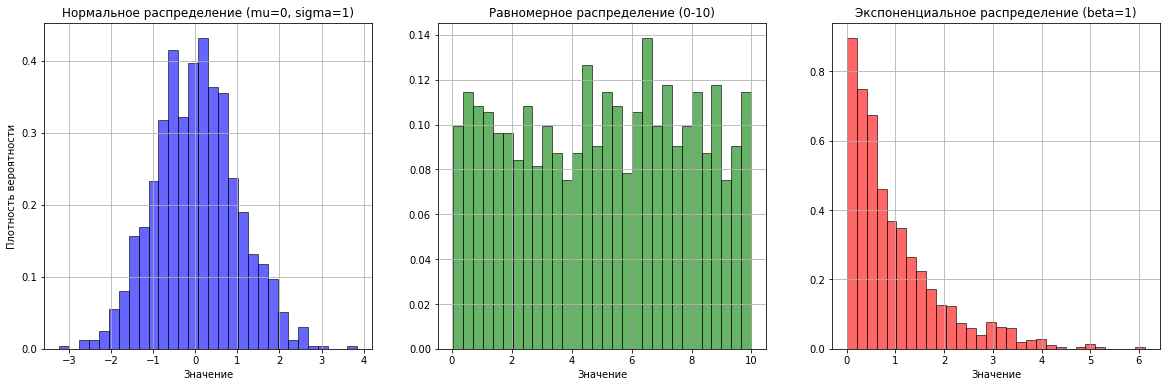

In [65]:
np.random.seed(42)

mu, sigma = 0, 1
data_normal = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(data_normal, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Нормальное распределение (mu=0, sigma=1)')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.grid(True)

low, high = 0, 10
data_uniform = np.random.uniform(low, high, 1000)

plt.subplot(1, 3, 2)
plt.hist(data_uniform, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
plt.title('Равномерное распределение (0-10)')
plt.xlabel('Значение')
plt.grid(True)


beta = 1.0  
data_exp = np.random.exponential(beta, 1000)

plt.subplot(1, 3, 3)
plt.hist(data_exp, bins=30, density=True, alpha=0.6, color='red', edgecolor='black')
plt.title('Экспоненциальное распределение (beta=1)')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

В данном случае лучше отказаться от t-теста, так как одним из критериев применения является: 
- распределена близко к нормальному (cтатья от Яндекс - https://education.yandex.ru/handbook/data-analysis/article/bazovye-statisticheskie-testy)


Полагаю, что в данном случае применимы тест Манна Уитни или тест Колмогорова-Смирнова.

### Задача 3: Парадокс Симпсона (2.5 балла)

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований:

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$,
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы:

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин?
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство.

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на лекциях, но вы можете про него прочитать здесь https://www.jmp.com/en/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence
В этом тесте для вычисления ожидаемых значений нужно оценить n+m параметров, среди которых два выражаются через остальные. То есть на самом деле оценивается n+m-2 параметра, поэтому количество степеней свободы в этой тесте это $nm-1-(n+m-2)=(n-1)\cdot(m-1)$

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[0.5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин?  Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [66]:
from scipy.stats import chi2_contingency

In [67]:
print(f"Доля выздровевших мужчин, которые принимали лекарство: {round((770/1650 * 100), 2)} %")
print(f"Доля выздровевших мужчин, которые не принимали лекарство: {round((88/223 * 100), 2)} %")

Доля выздровевших мужчин, которые принимали лекарство: 46.67 %
Доля выздровевших мужчин, которые не принимали лекарство: 39.46 %


Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [68]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [69]:
alpha = 0.05

hi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(men, correction=False)

print("H0: Среди мужчин вероятность выздоровления не зависит от приёма лекарства")
print("H1: Среди мужчин вероятность выздоровления зависит от приёма лекарства\n")

if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу, разница есть (p_value = {p_value.round(3)})")
else:
    print(f"Принимаем нулевую гипотезу, разница нет (p_value = {p_value.round(3)})")

H0: Среди мужчин вероятность выздоровления не зависит от приёма лекарства
H1: Среди мужчин вероятность выздоровления зависит от приёма лекарства

Отвергаем нулевую гипотезу, разница есть (p_value = 0.043)


__б)__ __[0.5 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`.

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [70]:
print(f"Общее число мужчин = {men.sum()}")

Общее число мужчин = 1873


Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [71]:
print(f"Общее число мужчин, которые принимали лекарство = {men[0].sum()}")
print(f"Общее число мужчин, которые не принимали лекарство = {men[1].sum()}")

Общее число мужчин, которые принимали лекарство = 1650
Общее число мужчин, которые не принимали лекарство = 223


Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [72]:
prob_B = (men[0,0] + men[1,0]) / men.sum()
prob_not_B = (men[0,1] + men[1,1]) / men.sum()

print(f"Вероятность выздороветь = {prob_B}")
print(f"Вероятность не выздороветь = {prob_not_B}")

Вероятность выздороветь = 0.4580886278697277
Вероятность не выздороветь = 0.5419113721302723


Расчитайте ожидаемые (теоретические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$.Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [73]:
n1 = men[0].sum()
n2 = men[1].sum()

result_matrix =  np.array([[n1 * prob_B, n1 * prob_not_B],
                           [n2 * prob_B, n2 * prob_not_B]])

print(f"Ручной расчет\n{result_matrix}")

Ручной расчет
[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


In [74]:
print(f"Вывод из библиотеки\n{expected_frequencies}")

Вывод из библиотеки
[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [75]:
p_value = 1 - stats.chi2.cdf((((men - result_matrix)**2) / result_matrix).sum(), df=1)
p_value

0.04268446899604583

__в)__ __[0.5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а)

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [76]:
print(f"Доля выздровевших женщин, которые принимали лекарство: {round((165/245 * 100), 2)} %")
print(f"Доля выздровевших женщин, которые не принимали лекарство: {round((440/750 * 100), 2)} %")

Доля выздровевших женщин, которые принимали лекарство: 67.35 %
Доля выздровевших женщин, которые не принимали лекарство: 58.67 %


Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [77]:
women = np.array([[165,80],[440,310]])
women

array([[165,  80],
       [440, 310]])

In [78]:
alpha = 0.05

hi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(women, correction=False)

print("H0: Среди женщин вероятность выздоровления не зависит от приёма лекарства")
print("H1: Среди женщин вероятность выздоровления зависит от приёма лекарства\n")

if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу, разница есть (p_value = {p_value.round(3)})")
else:
    print(f"Принимаем нулевую гипотезу, разница нет (p_value = {p_value.round(3)})")

H0: Среди женщин вероятность выздоровления не зависит от приёма лекарства
H1: Среди женщин вероятность выздоровления зависит от приёма лекарства

Отвергаем нулевую гипотезу, разница есть (p_value = 0.016)


__г)__ __[1 балл]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [79]:
all = np.array([[770 + 165, 880 + 80], [88 + 440, 135 + 310]])
all

array([[935, 960],
       [528, 445]])

In [80]:
print(f"Доля выздровевших, которые принимали лекарство: {round((all[0, 0]/all[0].sum() * 100), 2)} %")
print(f"Доля выздровевших, которые не принимали лекарство: {round((all[1, 0]/all[1].sum() * 100), 2)} %")

Доля выздровевших, которые принимали лекарство: 49.34 %
Доля выздровевших, которые не принимали лекарство: 54.27 %


In [81]:
alpha = 0.05

hi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(all, correction=False)

if p_value < alpha:
    print(f"Отвергаем нулевую гипотезу, разница есть (p_value = {p_value.round(3)})")
else:
    print(f"Принимаем нулевую гипотезу, разница нет (p_value = {p_value.round(3)})")

Отвергаем нулевую гипотезу, разница есть (p_value = 0.012)


In [82]:
p_value

0.012492547994073244

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

<b>Парадокс заключается в том, что среди мужчин принимавших лекарство % выздоровевших выше, чем среди тех, кто не принимал. Для ситуации с женщинами аналогично, а при общей выборке - доля выздровевших, которые не принимали лекарство больше доли выздровевших, которые принимали лекарство.</b>

Доля выздровевших мужчин, которые принимали лекарство: 46.67 %<br>
Доля выздровевших мужчин, которые не принимали лекарство: 39.46 %

Доля выздровевших женщин, которые принимали лекарство: 67.35 %<br>
Доля выздровевших женщин, которые не принимали лекарство: 58.67 %


Доля выздровевших, которые принимали лекарство: 49.34 %<br>
Доля выздровевших, которые не принимали лекарство: 54.27 %

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде.

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

### Задача 4: бомбардировки Лондона (2.5 баллов)

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если бы немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.  

Ещё больше данных о бомбардировке Лондона ищите здесь: http://bombsight.org/data/sources/

In [83]:
# prompt: Code that downloads https://drive.google.com/file/d/17W1uHt4CGP_4ZqJ5HACPrsrMEyCLK6Of/view?usp=sharing using wget

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=17W1uHt4CGP_4ZqJ5HACPrsrMEyCLK6Of' -O london_07-09-1940.tsv

--2025-06-23 22:10:18--  https://drive.google.com/uc?export=download&id=17W1uHt4CGP_4ZqJ5HACPrsrMEyCLK6Of
Resolving drive.google.com (drive.google.com)... 2a00:1450:4001:813::200e, 216.58.206.78
Connecting to drive.google.com (drive.google.com)|2a00:1450:4001:813::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=17W1uHt4CGP_4ZqJ5HACPrsrMEyCLK6Of&export=download [following]
--2025-06-23 22:10:18--  https://drive.usercontent.google.com/download?id=17W1uHt4CGP_4ZqJ5HACPrsrMEyCLK6Of&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2a00:1450:4001:80b::2001, 142.250.186.97
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2a00:1450:4001:80b::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97922 (96K) [application/octet-stream]
Saving to: ‘london_07-09-1940.tsv’

london_07-09-1940.t 100%[===================>]  95

In [84]:
df = pd.read_csv('london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


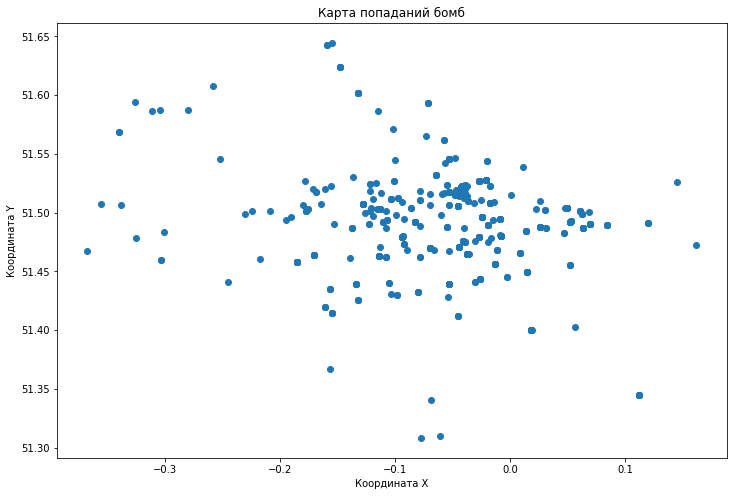

In [85]:
plt.figure(figsize=(12, 8))
plt.scatter(df.x, df.y)
plt.title('Карта попаданий бомб')
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.show()

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`.

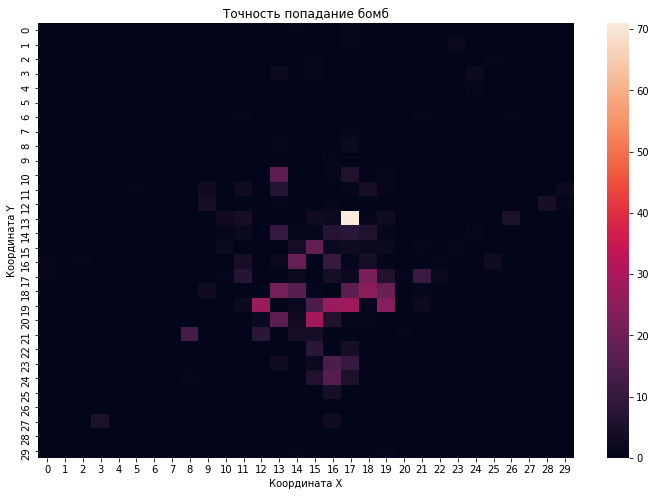

In [86]:
binx = np.linspace(df.x.min(), df.x.max(), 31)
biny = np.linspace(df.y.min(), df.y.max(), 31)

ret = binned_statistic_2d(df.x, df.y, None, 'count', bins=[binx, biny])

plt.figure(figsize=(12, 8))
sns.heatmap(ret.statistic)
plt.title('Точность попадание бомб')
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.show()

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения.

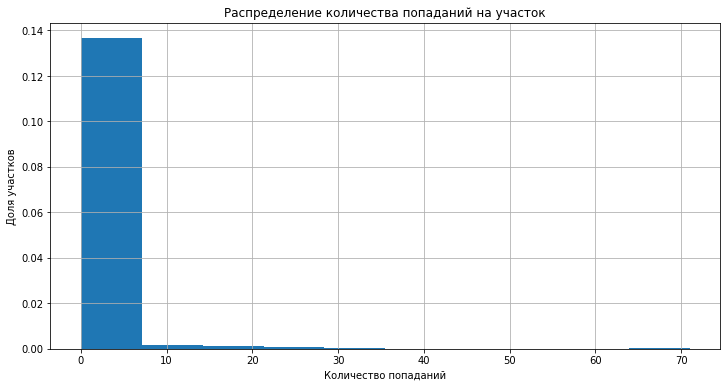

In [87]:
z = ret.statistic.flatten()

plt.figure(figsize=(12, 6))
plt.hist(z, bins=10, density=True)
plt.title('Распределение количества попаданий на участок')
plt.xlabel('Количество попаданий')
plt.ylabel('Доля участков')
plt.grid(True)
plt.show()

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона.

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга.

C помощью критерия согласия Пирсона хи квадрат проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.

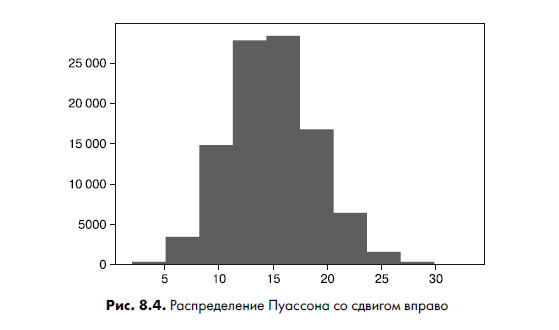

https://www.piter.com/blog/kniga-osnovy-python-dlya-data-science

In [88]:
observed = np.bincount(z.astype(int))[:10]
observed[9] = np.sum(z >= 9)
observed

array([774,  45,  20,  11,  12,   3,   5,   3,   3,  24])

In [89]:
expected = np.array([poisson.pmf(k, np.mean(z)) for k in range(9)])
expected = np.append(expected, (1 - poisson.cdf(8, np.mean(z))))
expected

array([4.34115590e-01, 3.62245342e-01, 1.51136807e-01, 4.20384229e-02,
       8.76968211e-03, 1.46356250e-03, 2.03543600e-04, 2.42636895e-05,
       2.53083761e-06, 2.55825100e-07])

In [90]:
alpha = 0.05

T = np.sum((observed - expected)**2 / expected)

value = chi2.ppf(0.95, len(observed) - 2)

print(f"t-статистика = {T}")
print(f"value = {value}\n")

print("H0: Распределение соответствует закону Пуассона. Бомбардировка не была прицельной")
print("H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной\n")

if T > value:
    print('Отвергаем нулевую гипотезу') 
    print("H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной")
else:
    print('Не отвергаем нулевую гипотезу')
    print("H0: Распределение соответствует закону Пуассона. Бомбардировка не была прицельной")

t-статистика = 2257000020.9031253
value = 15.50731305586545

H0: Распределение соответствует закону Пуассона. Бомбардировка не была прицельной
H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной

Отвергаем нулевую гипотезу
H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной


In [91]:
p_value = 1 - chi2.cdf(T, len(observed)-2)

print(f"p-value = {p_value}\n")

print("H0: Распределение соответствует закону Пуассона. Бомбардировка не была прицельной")
print("H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной\n")

if p_value < alpha:
    print('Отвергаем нулевую гипотезу') 
    print("H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной")
else:
    print('Не отвергаем нулевую гипотезу')
    print("H0: Распределение соответствует закону Пуассона. Бомбардировка не была прицельной")

p-value = 0.0

H0: Распределение соответствует закону Пуассона. Бомбардировка не была прицельной
H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной

Отвергаем нулевую гипотезу
H1: Распределение не соответствует закону Пуассона. Бомбардировка была прицельной


Какой вывод мы можем из этого сделать? Правда ли, что бомбардировка осуществлялась прицельно?

Статичтические эксперименты позволили понять, что распределение не соответствует закону Пуассона. Бомбардировка Лондона была прицельной